# Model the Problem

## Preprocessing the data

In [71]:
import pandas as pd
import re

In [72]:
df = pd.read_csv('data_tau_ta.csv')

In [73]:
df.head()

title  \
0         Deep Advances in Generative Modeling   
1      A Neural Network in 11 lines of Python    
2  Python, Machine Learning, and Language Wars   
3             Markov Chains Explained Visually   
4                   Dplython: Dplyr for Python   

                                                date  days  \
0          6 points by gwulfs 5 hours ago  | discuss     1   
1        2 points by dekhtiar 5 hours ago  | discuss     1   
2         3 points by pmigdal 7 hours ago  | discuss     1   
3  11 points by zeroviscosity 1 day ago  | 1 comment     1   
4  10 points by thenaturalist 1 day ago  | 3 comm...     1   

                                  tokens  \
0      deep,advances,generative,modeling   
1         neural,network,11,lines,python   
2  python,machine,learning,language,wars   
3       markov,chains,explained,visually   
4                  dplython,dplyr,python   

                                         stem  \
0           Deep Advances in Generative Model   
1     A Neural Network in 11 lines of Python    
2  Python, Machine Learning, and Language War   
3                Markov Chains Explained Visu   
4                  Dplython: Dplyr for Python   

                                         lemma  \
0         Deep Advances in Generative Modeling   
1      A Neural Network in 11 lines of Python    
2  Python, Machine Learning, and Language Wars   
3             Markov Chains Explained Visually   
4                   Dplython: Dplyr for Python   

                                            pos_tags  \
0  [('Deep', 'JJ'), ('Advances', 'NNS'), ('in', '...   
1  [('A', 'DT'), ('Neural', 'NNP'), ('Network', '...   
2  [('Python', 'NNP'), (',', ','), ('Machine', 'N...   
3  [('Markov', 'NNP'), ('Chains', 'NNP'), ('Expla...   
4  [('Dplython', 'NN'), (':', ':'), ('Dplyr', 'NN...   

                                    named_entities  
0                          ['Generative Modeling']  
1                                       ['Python']  
2  ['Python', 'Machine Learning', 'Language Wars']  
3                    ['Markov Chains', 'Visually']  
4                           ['Dplython', 'Python']

In [74]:
df.shape

(180, 8)

In [75]:
import nltk

In [76]:
from nltk.corpus import stopwords

In [77]:
stop = stopwords.words('english')

In [78]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [79]:
tokens_list = df['tokens'].tolist()

In [80]:
tokens_list

['deep,advances,generative,modeling',
 'neural,network,11,lines,python',
 'python,machine,learning,language,wars',
 'markov,chains,explained,visually',
 'dplython,dplyr,python',
 'inferring,causal,impact,using,bayesian,structural,time,series,models',
 'tutorial,web,scraping,mapping,breweries,import,io,r',
 'billion,taxi,rides,amazon,emr,running,spark',
 'rise,greedy,robots',
 'extracting,image,metadata,scale',
 'python,data,structures,algorithms,interviews',
 'lift,charts,data,scientist,secret,weapon',
 'become,machine,learning,expert,one,simple,step',
 'data,science,side,project',
 'simple,estimation,hierarchical,events,petersburg',
 'engineers,write,etl,high,functioning,data,science,departments',
 'unsupervised,computer,vision,current,state,art',
 'data,visualization,tools,r,dataisbeautiful,oc,creators,use',
 'data,engineering,slack,twelve,mistakes,made,first,three,months',
 'unusual,interactive,machine,learning,challenge',
 'datumbox,machine,learning,framework,0,7,0,released',
 'res

In [81]:
# Let us get the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['deep', 'advances', 'generative', 'modeling']
['neural', 'network', '11', 'lines', 'python']
['python', 'machine', 'learning', 'language', 'wars']
['markov', 'chains', 'explained', 'visually']
['dplython', 'dplyr', 'python']
['inferring', 'causal', 'impact', 'using', 'bayesian', 'structural', 'time', 'series', 'models']
['tutorial', 'web', 'scraping', 'mapping', 'breweries', 'import', 'io', 'r']
['billion', 'taxi', 'rides', 'amazon', 'emr', 'running', 'spark']
['rise', 'greedy', 'robots']
['extracting', 'image', 'metadata', 'scale']
['python', 'data', 'structures', 'algorithms', 'interviews']
['lift', 'charts', 'data', 'scientist', 'secret', 'weapon']
['become', 'machine', 'learning', 'expert', 'one', 'simple', 'step']
['data', 'science', 'side', 'project']
['simple', 'estimation', 'hierarchical', 'events', 'petersburg']
['engineers', 'write', 'etl', 'high', 'functioning', 'data', 'science', 'departments']
['unsupervised', 'computer', 'vision', 'current', 'state', 'art']
['data', 'vis

In [82]:
frequency_words['data']

41

## Term Frequency and Inverse Document Frequency

tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1]:8 It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

Let us start with the **"Term Frequency" - TF**

In [83]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [84]:
df_tfidf.head()

word  tf
0  changed   1
1   almost   1
2   source   1
3      ode   1
4     true   1

In [85]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [86]:
df_tfidf.head()

word  tf
390      data  41
144  learning  23
210   science  18
537   machine  16
364         r  11

Let us get in how many documents (each title) does the word occur

In [96]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [95]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [89]:
df_tfidf.head()

word  tf  document_count
390      data  41              38
144  learning  23              23
210   science  18              18
537   machine  16              16
364         r  11              11

In [90]:
df_tfidf.tail()

word  tf  document_count
238  drivendata   1               1
237     streams   1               1
236       graph   1               1
234    deriving   1               1
658       pymc3   1               1

In [91]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [92]:
total_docs

180

### let us compute the tf-idf 

**tf-idf = tf . idf**

**idf = log(total_docs/number of documents that contain the word)**

In [97]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [99]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [100]:
df_tfidf.head()

word  tf  document_count      tfidf
390      data  41              38  27.695045
144  learning  23              23  20.551527
210   science  18              18  18.000000
537   machine  16              16  16.818440
364         r  11              11  13.352678

In [101]:
df_tfidf.tail()

word  tf  document_count     tfidf
238  drivendata   1               1  2.255273
237     streams   1               1  2.255273
236       graph   1               1  2.255273
234    deriving   1               1  2.255273
658       pymc3   1               1  2.255273

In [102]:
df_tfidf.sort(columns='tfidf',ascending=True,inplace=True)

/Users/amitkaps/Documents/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [103]:
df_tfidf.head()

word  tf  document_count     tfidf
496     initial   1               1  2.255273
150  understand   1               1  2.255273
152  historical   1               1  2.255273
161     service   1               1  2.255273
153       cloud   1               1  2.255273

In [104]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [105]:
df_tfidf.tail()

word  tf  document_count      tfidf
364         r  11              11  13.352678
537   machine  16              16  16.818440
210   science  18              18  18.000000
144  learning  23              23  20.551527
390      data  41              38  27.695045

In [106]:
df_tfidf.set_index('word', inplace=True)

In [107]:
df_tfidf.head()

tf  document_count     tfidf
word                                    
initial      1               1  2.255273
understand   1               1  2.255273
historical   1               1  2.255273
service      1               1  2.255273
cloud        1               1  2.255273

** now let us plot a word cloud to see the prominence of the word **

In [108]:
wordcloud = WordCloud()

In [109]:
word_tfidf = df_tfidf['tfidf'].to_dict()

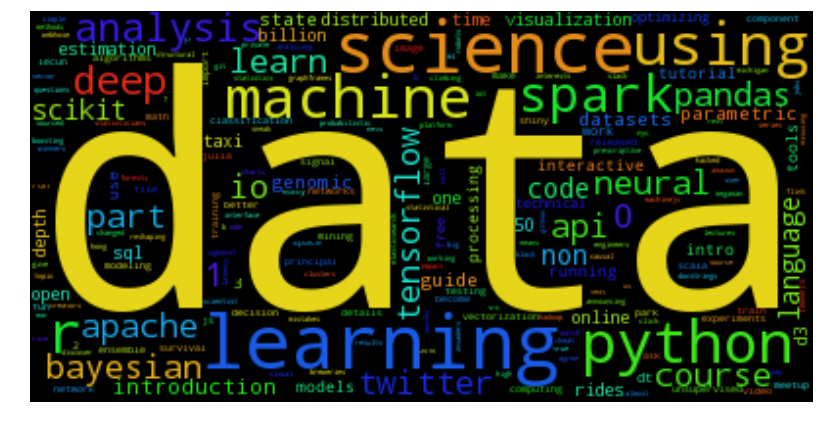

In [110]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Topic modelling


In [112]:
import lda
import numpy as np
import lda.datasets
import sklearn.feature_extraction.text as text

Generating the document term matrix

In [113]:
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [114]:
dtm = vectorizer.fit_transform(df.title).toarray()

In [115]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Loading the vocabulary

In [116]:
vocab = np.array(vectorizer.get_feature_names())

In [117]:
vocab

array(['10', '101', '11', '16', '2016', '50', '8m', 'access', 'advances',
       'affect', 'age', 'agree', 'aka', 'algorithms', 'amazon',
       'analogies', 'analysis', 'analytical', 'analytics', 'analyze',
       'analyzing', 'animated', 'announcing', 'answers', 'apache', 'api',
       'app', 'apple', 'appliance', 'archive', 'arrow', 'art', 'article',
       'artificial', 'artists', 'ask', 'asked', 'austin', 'authoring',
       'auto', 'automate', 'automated', 'aws', 'aylien', 'background',
       'ballr', 'bay', 'bayesian', 'beginners', 'behavior', 'bengio',
       'better', 'big', 'biggest', 'billion', 'black', 'blending',
       'boosting', 'bootstrap', 'bowl', 'box', 'breweries', 'building',
       'caffe', 'campaigns', 'careers', 'cartoon', 'categorical', 'causal',
       'causality', 'certified', 'chains', 'challenge', 'change',
       'changed', 'changes', 'channel', 'characters', 'charts', 'cheat',
       'choice', 'choices', 'classification', 'classifier', 'classifiers',
   

In [118]:
titles = df.title

In [119]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)

In [120]:
model.fit(dtm)

In [121]:
model.topic_word_

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

In [122]:
topic_word = model.topic_word_ 

In [123]:
topic_word

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

In [124]:
n_top_words = 8

In [125]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: spark apache pandas code work taxi open
Topic 1: learning machine deep non guide interactive depth
Topic 2: data science course introduction sql use genomic
Topic 3: python using analysis bayesian neural learn scikit
Topic 4: twitter io language api processing d3 free


In [126]:
doc_topic = model.doc_topic_

In [127]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

topic: 4 , Deep Advances in Generative Modeling
topic: 3 , A Neural Network in 11 lines of Python 
topic: 1 , Python, Machine Learning, and Language Wars
topic: 2 , Markov Chains Explained Visually
topic: 3 , Dplython: Dplyr for Python
topic: 3 , Inferring causal impact using Bayesian structural time-series models
topic: 4 , Tutorial: Web scraping and mapping breweries with import.io and R
topic: 0 , A Billion Taxi Rides on Amazon EMR running Spark
topic: 3 , The rise of greedy robots
topic: 3 , Extracting image metadata at scale


# Sentiment Analysis


In [128]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [129]:
pos_features = []
neg_features = []

In [130]:
def make_full_dict(word):
    return dict([(word, True)])

In [131]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [132]:
pos_features

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [133]:
with open('negative_words.txt','r',encoding='utf-8') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [134]:
neg_features

[[{'2-faced': True}, 'neg'],
 [{'2-faces': True}, 'neg'],
 [{'abnormal': True}, 'neg'],
 [{'abolish': True}, 'neg'],
 [{'abominable': True}, 'neg'],
 [{'abominably': True}, 'neg'],
 [{'abominate': True}, 'neg'],
 [{'abomination': True}, 'neg'],
 [{'abort': True}, 'neg'],
 [{'aborted': True}, 'neg'],
 [{'aborts': True}, 'neg'],
 [{'abrade': True}, 'neg'],
 [{'abrasive': True}, 'neg'],
 [{'abrupt': True}, 'neg'],
 [{'abruptly': True}, 'neg'],
 [{'abscond': True}, 'neg'],
 [{'absence': True}, 'neg'],
 [{'absent-minded': True}, 'neg'],
 [{'absentee': True}, 'neg'],
 [{'absurd': True}, 'neg'],
 [{'absurdity': True}, 'neg'],
 [{'absurdly': True}, 'neg'],
 [{'absurdness': True}, 'neg'],
 [{'abuse': True}, 'neg'],
 [{'abused': True}, 'neg'],
 [{'abuses': True}, 'neg'],
 [{'abusive': True}, 'neg'],
 [{'abysmal': True}, 'neg'],
 [{'abysmally': True}, 'neg'],
 [{'abyss': True}, 'neg'],
 [{'accidental': True}, 'neg'],
 [{'accost': True}, 'neg'],
 [{'accursed': True}, 'neg'],
 [{'accusation': True}

In [135]:
len(pos_features),len(neg_features)

(8020, 4783)

In [136]:
trainFeatures = pos_features + neg_features

In [137]:
trainFeatures

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [138]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [139]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [140]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [141]:
import re

In [142]:
neg_test = 'I hate data science'

In [176]:
title_words = re.findall(r"[\w']+|[.,!?;]",
                         'The Daily Mail stole My Visualization, Twice')

In [177]:
title_words

['The', 'Daily', 'Mail', 'stole', 'My', 'Visualization', ',', 'Twice']

In [178]:
test=[]

In [179]:
test.append([make_full_dict_sent(title_words),''])

In [180]:
test

[[{',': True,
   'Daily': True,
   'Mail': True,
   'My': True,
   'The': True,
   'Twice': True,
   'Visualization': True,
   'stole': True},
  '']]

In [181]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

neg


In [184]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc.lower())
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    

pos Deep Advances in Generative Modeling
pos A Neural Network in 11 lines of Python 
pos Python, Machine Learning, and Language Wars
pos Markov Chains Explained Visually
pos Dplython: Dplyr for Python
pos Inferring causal impact using Bayesian structural time-series models
pos Tutorial: Web scraping and mapping breweries with import.io and R
pos A Billion Taxi Rides on Amazon EMR running Spark
neg The rise of greedy robots
pos Extracting image metadata at scale
pos Python for Data Structures, Algorithms, and Interviews
pos Lift charts - A data scientist's secret weapon
pos How To Become A Machine Learning Expert In One Simple Step
pos Data Science Side Project
pos Simple estimation of hierarchical events with petersburg
pos Engineers Shouldn?t Write ETL: High Functioning Data Science Departments
pos Unsupervised Computer Vision: The Current State of the Art
pos What data visualization tools do /r/DataIsBeautiful OC creators use?
neg Data Engineering at Slack: Twelve Mistakes I've Made 